In [180]:
import numpy as np
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 6

import seaborn as sns
import pandas as pd
from random import choices

from tqdm.notebook import tqdm

from scipy import stats

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

import openml

In [2]:
X_data_list = []
y_data_list = []
dataset_name = []

for task_num, task_id in enumerate(tqdm(openml.study.get_suite("OpenML-CC18").tasks)):
    try:
        successfully_loaded = True
        dataset = openml.datasets.get_dataset(openml.tasks.get_task(task_id).dataset_id)
        print(dataset)
        dataset_name.append(dataset.name)
        X, y, is_categorical, _ = dataset.get_data(
            dataset_format="array", target=dataset.default_target_attribute
        )
        _, y = np.unique(y, return_inverse = True)
        #X = np.nan_to_num(X[:, np.where(np.array(is_categorical) == False)[0]])
        X = np.nan_to_num(X)
    except TypeError:
        print("Skipping Dataset {}".format(dataset_idx))
        print()
        successfully_loaded = False
    if successfully_loaded and np.shape(X)[1] > 0:
        print('\n\nSuccess: ', task_num)
        X_data_list.append(X)
        y_data_list.append(y)

OpenML Dataset
Name..........: kr-vs-kp
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:19:28
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/3/kr-vs-kp.arff
OpenML URL....: https://www.openml.org/d/3
# of features.: 37
# of instances: 3196


Success:  0
OpenML Dataset
Name..........: letter
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:19:41
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/6/letter.arff
OpenML URL....: https://www.openml.org/d/6
# of features.: 17
# of instances: 20000


Success:  1
OpenML Dataset
Name..........: balance-scale
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:19:55
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/11/balance-scale.arff
OpenML URL....: https://www.openml.org/d/11
# of features.: 5
# of instances: 625


Success:  2
OpenML Dataset
Name..........: mfeat-factors
Version.......: 1
Format...

OpenML Dataset
Name..........: mnist_784
Version.......: 1
Format........: ARFF
Upload Date...: 2014-09-29 03:28:38
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/52667/mnist_784.arff
OpenML URL....: https://www.openml.org/d/554
# of features.: 785
# of instances: 70000


Success:  27
OpenML Dataset
Name..........: pc4
Version.......: 1
Format........: ARFF
Upload Date...: 2014-10-06 23:57:12
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/53932/pc4.arff
OpenML URL....: https://www.openml.org/d/1049
# of features.: 38
# of instances: 1458


Success:  28
OpenML Dataset
Name..........: pc3
Version.......: 1
Format........: ARFF
Upload Date...: 2014-10-06 23:57:13
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/53933/pc3.arff
OpenML URL....: https://www.openml.org/d/1050
# of features.: 38
# of instances: 1563


Success:  29
OpenML Dataset
Name..........: jm1
Version.......: 1
Format........: ARF

OpenML Dataset
Name..........: har
Version.......: 1
Format........: ARFF
Upload Date...: 2015-05-22 20:38:11
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/1589271/har.arff
OpenML URL....: https://www.openml.org/d/1478
# of features.: 562
# of instances: 10299


Success:  53
OpenML Dataset
Name..........: dresses-sales
Version.......: 2
Format........: ARFF
Upload Date...: 2016-04-11 19:57:27
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/1910507/dresses-sales.arff
OpenML URL....: https://www.openml.org/d/23381
# of features.: 13
# of instances: 500


Success:  54
OpenML Dataset
Name..........: texture
Version.......: 1
Format........: ARFF
Upload Date...: 2016-07-29 21:03:14
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/4535764/texture.arff
OpenML URL....: https://www.openml.org/d/40499
# of features.: 41
# of instances: 5500


Success:  55
OpenML Dataset
Name..........: connect-4
Version

In [3]:
sam = []
feat = []
for i in X_data_list:
    sam.append(i.shape[0])
    feat.append(i.shape[1])
    print('Samples: ', i.shape[0])
    print('Features: ', i.shape[1])
    print('\n')

Samples:  3196
Features:  36


Samples:  20000
Features:  16


Samples:  625
Features:  4


Samples:  2000
Features:  216


Samples:  2000
Features:  76


Samples:  699
Features:  9


Samples:  2000
Features:  64


Samples:  2000
Features:  6


Samples:  2000
Features:  47


Samples:  1473
Features:  9


Samples:  5620
Features:  64


Samples:  690
Features:  15


Samples:  1000
Features:  20


Samples:  10992
Features:  16


Samples:  768
Features:  8


Samples:  4601
Features:  57


Samples:  3190
Features:  60


Samples:  958
Features:  9


Samples:  846
Features:  18


Samples:  45312
Features:  8


Samples:  6430
Features:  36


Samples:  736
Features:  19


Samples:  3772
Features:  29


Samples:  990
Features:  12


Samples:  7797
Features:  617


Samples:  841
Features:  70


Samples:  797
Features:  4


Samples:  70000
Features:  784


Samples:  1458
Features:  37


Samples:  1563
Features:  37


Samples:  10885
Features:  21


Samples:  522
Features:  21


Samples:  2109
Feat

In [4]:
unique_classes = []
for i in y_data_list:
    unique_classes.append(len(np.unique(i)))
print(unique_classes)

count = 0
for i in unique_classes:
    if i == 2:
        count += 1
print(count)

[2, 26, 3, 10, 10, 2, 10, 10, 10, 3, 10, 2, 2, 10, 2, 2, 3, 2, 4, 2, 6, 5, 2, 11, 26, 4, 6, 10, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 10, 2, 2, 2, 2, 9, 6, 2, 2, 2, 2, 2, 5, 6, 2, 11, 3, 8, 7, 2, 2, 4, 7, 10, 10, 3, 2, 46, 10, 2, 3, 2]
35


In [186]:
d = {}

for i in y_data_list[1]:
    if i not in d:
        d[i] = 1
    else:
        d[i] += 1
total = sum(d.values())
d = {k: v / total for k, v in d.items()}
d

{25: 0.0367,
 15: 0.04015,
 18: 0.0374,
 7: 0.0367,
 5: 0.03875,
 13: 0.03915,
 17: 0.0379,
 12: 0.0396,
 3: 0.04025,
 21: 0.0382,
 0: 0.03945,
 10: 0.03695,
 4: 0.0384,
 14: 0.03765,
 16: 0.03915,
 11: 0.03805,
 23: 0.03935,
 24: 0.0393,
 8: 0.03775,
 22: 0.0376,
 20: 0.04065,
 19: 0.0398,
 2: 0.0368,
 6: 0.03865,
 1: 0.0383,
 9: 0.03735}

In [187]:
class_dict = {}
class_list = choices(population=list(d), weights=d.values(), k=100)
for i in class_list:
    if i not in class_dict:
        class_dict[i] = 1
    else:
        class_dict[i] += 1

class_dict

{2: 6,
 15: 6,
 9: 4,
 16: 7,
 14: 3,
 23: 5,
 5: 4,
 4: 6,
 25: 4,
 20: 3,
 1: 3,
 6: 4,
 8: 3,
 22: 6,
 18: 4,
 24: 4,
 0: 4,
 13: 3,
 7: 1,
 10: 5,
 17: 1,
 11: 2,
 12: 2,
 19: 5,
 21: 3,
 3: 2}

In [182]:
dataset_name_new = np.expand_dims(np.array(dataset_name), axis=1)
sam_new = np.expand_dims(np.array(sam), axis=1)
feat_new = np.expand_dims(np.array(feat), axis=1)
unique_classes_new = np.expand_dims(np.array(unique_classes), axis=1)

pd.set_option("display.max_rows", None, "display.max_columns", None)

total = np.concatenate((dataset_name_new, sam_new, feat_new, unique_classes_new), axis=1)
df = pd.DataFrame(total)
df.columns = ['Dataset Name', 'Samples', 'Features', 'Target Classes']
df

,Dataset Name,Samples,Features,Target Classes
0,kr-vs-kp,3196,36,2
1,letter,20000,16,26
2,balance-scale,625,4,3
3,mfeat-factors,2000,216,10
4,mfeat-fourier,2000,76,10
5,breast-w,699,9,2
6,mfeat-karhunen,2000,64,10
7,mfeat-morphological,2000,6,10
8,mfeat-zernike,2000,47,10
9,cmc,1473,9,3


# Bootstrapping

In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data_list[0], y_data_list[0], test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

print(X_train.shape)

(2237, 36)


In [225]:
def perClass(y):
    d = {}

    for i in y:
        if i not in d:
            d[i] = 1
        else:
            d[i] += 1
    total = sum(d.values())
    d = {k: v / total for k, v in d.items()}

    class_dict = {}
    for i in d:
        class_dict[i] = round(d[i] * len(y))
        
#     class_dict = {}
#     class_list = choices(population=list(d), weights=d.values(), k=len(y))
#     for i in class_list:
#         if i not in class_dict:
#             class_dict[i] = 1
#         else:
#             class_dict[i] += 1

    return class_dict

In [226]:
class_dict = perClass(y_train)
class_dict

{1: 1074, 0: 1163}

In [269]:
def stratified_bootstrap(X,y):
    
    class_dict = perClass(y)
    
    total_bootstrap = []
    total_out_of_bootstrap = []

    for key in class_dict:
        class_indices = list(np.where(y_train == key)[0])

        bootstrap = sorted(choices(class_indices, k=class_dict[key]))
        out_of_bootstrap = sorted(list(set(class_indices).difference(set(bootstrap))))

        total_bootstrap.extend(bootstrap)
        total_out_of_bootstrap.extend(out_of_bootstrap)

        total_bootstrap = sorted(total_bootstrap)
        total_out_of_bootstrap = sorted(total_out_of_bootstrap)

    b = np.array(total_bootstrap)
    oob = np.array(total_out_of_bootstrap)

    X_train_bootstrap = X[b]
    X_test_bootstrap = X[oob]

    y_train_bootstrap = y[b]
    y_test_bootstrap = y[oob]

    X_bootstrap = np.concatenate((X_test_bootstrap,X_train_bootstrap), axis=0)
    y_bootstrap = np.concatenate((y_test_bootstrap,y_train_bootstrap), axis=0)

    inds = np.zeros(y_bootstrap.shape)
    inds[X_test_bootstrap.shape[0]:]=-1

    return X_bootstrap, y_bootstrap, inds

-2237.0

In [262]:
X_train_bootstrap

array([[ 0.3578949 ,  0.2756775 ,  0.20115943, ..., -0.77026284,
        -0.6040336 , -0.57580173],
       [ 0.3578949 ,  0.2756775 ,  0.20115943, ...,  1.2982582 ,
        -0.6040336 , -0.57580173],
       [-2.7941165 ,  0.2756775 , -4.9711814 , ...,  1.2982582 ,
         1.655537  , -0.57580173],
       ...,
       [ 0.3578949 ,  0.2756775 ,  0.20115943, ..., -0.77026284,
        -0.6040336 , -0.57580173],
       [ 0.3578949 ,  0.2756775 ,  0.20115943, ..., -0.77026284,
         1.655537  , -0.57580173],
       [ 0.3578949 ,  0.2756775 ,  0.20115943, ..., -0.77026284,
         1.655537  , -0.57580173]], dtype=float32)

In [15]:
def bootstrap(X, y):
    empty = [i for i in range(X.shape[0])]

    bootstrap = sorted(choices(empty, k=len(empty)))
    out_of_bootstrap = (set(empty).difference(set(bootstrap)))

    b = np.array(bootstrap)
    oob = np.array(sorted(list(out_of_bootstrap)))

    X_train_bootstrap = X[b]
    X_test_bootstrap = X[oob]

    y_train_bootstrap = y[b]
    y_test_bootstrap = y[oob]

    X_bootstrap = np.concatenate((X_test_bootstrap,X_train_bootstrap), axis=0)
    y_bootstrap = np.concatenate((y_test_bootstrap,y_train_bootstrap), axis=0)


    inds = np.zeros(y_bootstrap.shape)
    inds[X_test_bootstrap.shape[0]:]=-1
    
    return X_bootstrap, y_bootstrap, inds

In [270]:
allscores = np.zeros([3,4])
allparams = np.zeros([3,4])

allscoresrf = np.zeros([3,10])
allparamsrf = np.zeros([3,10])


for trial in range(3):
#     X_bootstrap, y_bootstrap, inds = bootstrap(X_train, y_train)
    X_bootstrap, y_bootstrap, inds = stratified_bootstrap(X_train, y_train)

    
    parameters = {
        'hidden_layer_sizes' : [60,100],
        'alpha' : [0.0001,0.1]
    }
    
    parameters_rf = {
        'max_features' : [2,5,8,11,14,17,20,23,26,29]
    }

    ps = PredefinedSplit(test_fold = list(inds))

    mlp = MLPClassifier(max_iter=200)
    clf = GridSearchCV(mlp, parameters, n_jobs=-1, cv=ps, verbose=1)
    clf.fit(X_bootstrap, y_bootstrap)
    
    rf = RandomForestClassifier(n_estimators=500)
    clfrf = GridSearchCV(rf, parameters_rf, n_jobs=-1, verbose=1)
    clfrf.fit(X_bootstrap, y_bootstrap)


    # mlp = MLPClassifier(max_iter=400)
    # clf = GridSearchCV(mlp, parameters, n_jobs=-1, verbose=1)
    # clf.fit(X_train_bootstrap, y_train_bootstrap)

    allscores[trial,:] = clf.cv_results_['mean_test_score']
    allscoresrf[trial,:] = clfrf.cv_results_['mean_test_score']

allparams = clf.cv_results_['params']
allparamsrf = clfrf.cv_results_['params']

means = allscores.mean(axis=0)
print(means)

meansrf = allscoresrf.mean(axis=0)
print(meansrf)


best_params = allparams[np.argmax(means)]
print(best_params)

best_paramsrf = allparamsrf[np.argmax(meansrf)]
print(best_paramsrf)

Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.9s finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.2s finished


Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.6s finished


[0.99089623 0.99009301 0.99006617 0.9896943 ]
[0.97820888 0.98525572 0.98633745 0.98926554 0.99056883 0.99045655
 0.99056654 0.99208452 0.99187001 0.99111049]
{'alpha': 0.0001, 'hidden_layer_sizes': 60}
{'max_features': 23}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import keras

def test_suite_boot(
    X_train,
    y_train,
    X_test,
    y_test,
    training_sample_sizes,
    trials,
    best_params,
    best_paramsrf,
    num_trees=500,
    max_depth=None,
    n_jobs=-1,
    rf_verbose=0
):

    rf_evolution = np.zeros((len(training_sample_sizes), trials))
    dn_evolution = np.zeros((len(training_sample_sizes), trials))
    

    for trial in range(trials):

        for sample_size_index, max_sample_size in enumerate(training_sample_sizes):

#             X_train = X_train.astype("float32")
#             y_train = y_train.astype("float32")
            s = random_sample(X_train, max_sample_size)
            X_train_new = X_train[s]
            y_train_new = y_train[s]
            
            y_train_cat = to_categorical(y_train, len(np.unique(y_train)))
            y_test_cat = to_categorical(y_test, len(np.unique(y_test)))
#             print(y_train_cat.shape)
#             X_test, y_test = sparse_parity(testing_sample_size, p, p_star)

            rf_model = rf_classifier(
                X_train=X_train_new,
                y_train=y_train_new,
                num_trees=num_trees,
                max_depth=max_depth,
                n_jobs=n_jobs,
                verbose=rf_verbose,
                best_paramsrf = best_paramsrf,
            )
            
            rf_predictions = rf_model.predict(X_test)
            rf_error = accuracy_score(y_test, rf_predictions)
            rf_evolution[sample_size_index][trial] = rf_error
            
            
            
            clf = MLPClassifier(**best_params)
            clf.fit(X_train_new, y_train_new)
            clf.predict(X_test)
            mlp_score = clf.score(X_test,y_test)
            
            dn_evolution[sample_size_index][trial] = mlp_score


    return rf_evolution, dn_evolution

In [272]:
from random import sample

def random_sample(data, num_samples):
    ordered = [i for i in range(len(data))]

    return sorted(sample(ordered,num_samples))

def rf_classifier(X_train,
    y_train,
    num_trees,
    max_depth,
    n_jobs,
    verbose,
    best_paramsrf,
):

    rf_model = RandomForestClassifier(**best_paramsrf,
        n_estimators=num_trees, max_depth=max_depth, n_jobs=n_jobs, verbose=verbose
    )
    rf_model.fit(X_train, y_train)

    return rf_model

In [ ]:
# training_sample_sizes = [10,30,87,257,758,2237]
training_sample_sizes = [10,22,47,102,220,477,1033,2237]


trials = 20

rf_evolution, dn_evolution = test_suite_boot(X_train, 
                       y_train, 
                       X_test, 
                       y_test, 
                       training_sample_sizes, 
                       trials,
                       best_params,
                       best_paramsrf
            )

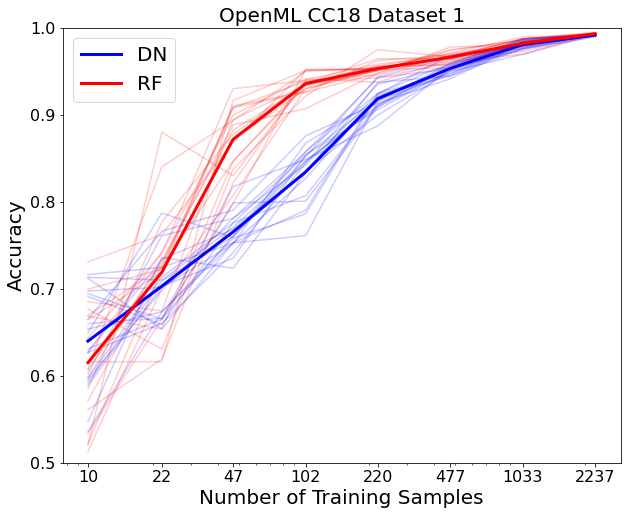

In [73]:
dn_evolution_mean = np.mean(dn_evolution, axis=1)
rf_evolution_mean = np.mean(rf_evolution, axis=1)

yerr_dn = stats.sem(dn_evolution, axis=1)
yerr_rf = stats.sem(rf_evolution, axis=1)

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)

for row in range(dn_evolution.shape[1]):
    ax.errorbar(
        training_sample_sizes,
        dn_evolution[:,row],
    #     yerr=yerr_dn,
        linewidth=1.5,
        c="b",
        alpha=0.2)
    
    ax.errorbar(
        training_sample_sizes,
        rf_evolution[:,row],
    #     yerr=yerr_dn,
        linewidth=1.5,
        c="r",
        alpha=0.2)
        
ax.errorbar(
    training_sample_sizes,
    dn_evolution_mean,
#     yerr=yerr_dn,
    linewidth=3,
    c="b",
    alpha=1,
    label="DN",
)
ax.errorbar(
    training_sample_sizes,
    rf_evolution_mean,
#     yerr=yerr_rf,
    linewidth=3,
    c="r",
    alpha=1,
    label="RF",
)

ax.set_xscale('log')
ax.set_xticks(training_sample_sizes)
ax.set_xticklabels(training_sample_sizes)


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel("Number of Training Samples", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("OpenML CC18 Dataset 1", fontsize=20)

plt.ylim((0.5,1))

handles, labels = ax.get_legend_handles_labels()
handles = [h[0] for h in handles]
ax.legend(handles, labels, prop={"size": 20})

In [50]:
dn_evolution[:,1]

array([0.66423358, 0.73618352, 0.77267987, 0.84775808, 0.93534932,
       0.95620438, 0.98331595, 0.99374348])

In [115]:
p = X_train.shape[1]
list(set([round(p/4),round(p/3),round(p/2),round(p/1.5),round(p)]))

[1, 2, 3, 4]

In [ ]:
all_datasets_norm_boot4 = {}
all_sample_sizes = []
all_params = []

for dataset in range(18):
    print('\n\n\n\nDATASET', dataset)
    print('\n\n\n\n')
    X_train, X_test, y_train, y_test = train_test_split(X_data_list[dataset], 
                                                        y_data_list[dataset], test_size=0.3, random_state=42)


    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    scaler.fit(X_test)
    X_test = scaler.transform(X_test)
    print(X_train.shape)
    
    allscores = np.zeros([6,28])
    allparams = np.zeros([6,28])
    
    p = X_train.shape[1]
    l = list(set([round(p/4),round(np.sqrt(p)),round(p/3),round(p/1.5),round(p)]))
    parameters_rf = {
        'max_features' : l

    }
    
    allscoresrf = np.zeros([6,len(l)])
    allparamsrf = np.zeros([6,len(l)])


    for trial in range(3):
#         X_bootstrap, y_bootstrap, inds = bootstrap(X_train, y_train)
        X_bootstrap, y_bootstrap, inds = stratified_bootstrap(X_train, y_train)


        parameters = {
#             'hidden_layer_sizes' : [20,100,200,400],
            'hidden_layer_sizes' : [20,80,140,200,260,320,400],
            'alpha' : [0.0001,0.001,0.01,0.1]
        }
        
#         parameters_rf = {
#             'max_features' : [2,5,8,11,14,17,20,23,26,29]
#         }

        ps = PredefinedSplit(test_fold = list(inds))

        mlp = MLPClassifier(max_iter=200)
        clf = GridSearchCV(mlp, parameters, n_jobs=-1, cv=ps, verbose=1)
        clf.fit(X_bootstrap, y_bootstrap)
        
        rf = RandomForestClassifier(n_estimators=500)
        clfrf = GridSearchCV(rf, parameters_rf, n_jobs=-1, verbose=1)
        clfrf.fit(X_bootstrap, y_bootstrap)


        # mlp = MLPClassifier(max_iter=400)
        # clf = GridSearchCV(mlp, parameters, n_jobs=-1, verbose=1)
        # clf.fit(X_train_bootstrap, y_train_bootstrap)

        allscores[trial,:] = clf.cv_results_['mean_test_score']
        allscoresrf[trial,:] = clfrf.cv_results_['mean_test_score']

    allparams = clf.cv_results_['params']
    allparamsrf = clfrf.cv_results_['params']

    means = allscores.mean(axis=0)
#     print(means)

    meansrf = allscoresrf.mean(axis=0)
#     print(meansrf)


    best_params = allparams[np.argmax(means)]
    print(best_params)
    
    best_paramsrf = allparamsrf[np.argmax(meansrf)]
    print(best_paramsrf)
    
    all_params.append([best_params, best_paramsrf])

#     training_sample_sizes = [round(X_train.shape[0]/5),round(X_train.shape[0]/2.5),
#                              round(X_train.shape[0]/2),round(X_train.shape[0]/1.5),
#                              X_train.shape[0]]

    temp = np.log10((len(np.unique(y_train))) * 5)
    t = (np.log10(X_train.shape[0]) - temp) / 7
    training_sample_sizes = []
    for i in range(8):
        training_sample_sizes.append(round(np.power(10,temp + i*t)))

    all_sample_sizes.append(training_sample_sizes)
    
    trials = 10
    
#     all_sample_sizes = [[8,50,200,1000,X_train.shape[0]],[104,500,2000,6000,X_train.shape[0]],
#         [12,50,100,200,X_train.shape[0]],[40,100,300,600,X_train.shape[0]],
#         [40,100,300,600,X_train.shape[0]],[8,50,100,200,X_train.shape[0]]]
    
    rf_evolution, dn_evolution = test_suite_boot(X_train, 
                       y_train, 
                       X_test, 
                       y_test, 
                       training_sample_sizes, 
#                        all_sample_sizes[dataset],
                       trials,
                       best_params,
                       best_paramsrf,
                       num_trees=500
            )
    
    all_datasets_norm_boot4[dataset] = [rf_evolution, dn_evolution]
    

In [282]:
# %store all_datasets_norm_boot3
%store all_datasets_norm_boot4
%store all_params

Stored 'all_datasets_norm_boot4' (dict)
Stored 'all_params' (list)


In [283]:
all_datasets_norm_boot4

{0: [array([[0.52763295, 0.59436913, 0.49217935, 0.62877998, 0.58289885,
          0.66423358, 0.65067779, 0.55161627, 0.67570386, 0.56100104],
         [0.70907195, 0.70907195, 0.75182482, 0.70177268, 0.67778936,
          0.71637122, 0.84045881, 0.72888425, 0.79666319, 0.72679875],
         [0.92909281, 0.79770594, 0.92179353, 0.92492179, 0.90302398,
          0.81021898, 0.83211679, 0.78727842, 0.88633994, 0.86861314],
         [0.9468196 , 0.95411887, 0.92387904, 0.9468196 , 0.94577685,
          0.94369135, 0.94160584, 0.91866528, 0.93952033, 0.92387904],
         [0.94056309, 0.9270073 , 0.94369135, 0.95828989, 0.94577685,
          0.94264859, 0.95307612, 0.94577685, 0.94786236, 0.95620438],
         [0.96141814, 0.96767466, 0.95724713, 0.96871741, 0.96350365,
          0.98540146, 0.9645464 , 0.96558916, 0.97601668, 0.97080292],
         [0.98852972, 0.9801877 , 0.97810219, 0.98644421, 0.97705944,
          0.98123045, 0.98540146, 0.97705944, 0.9801877 , 0.97497393],
         [

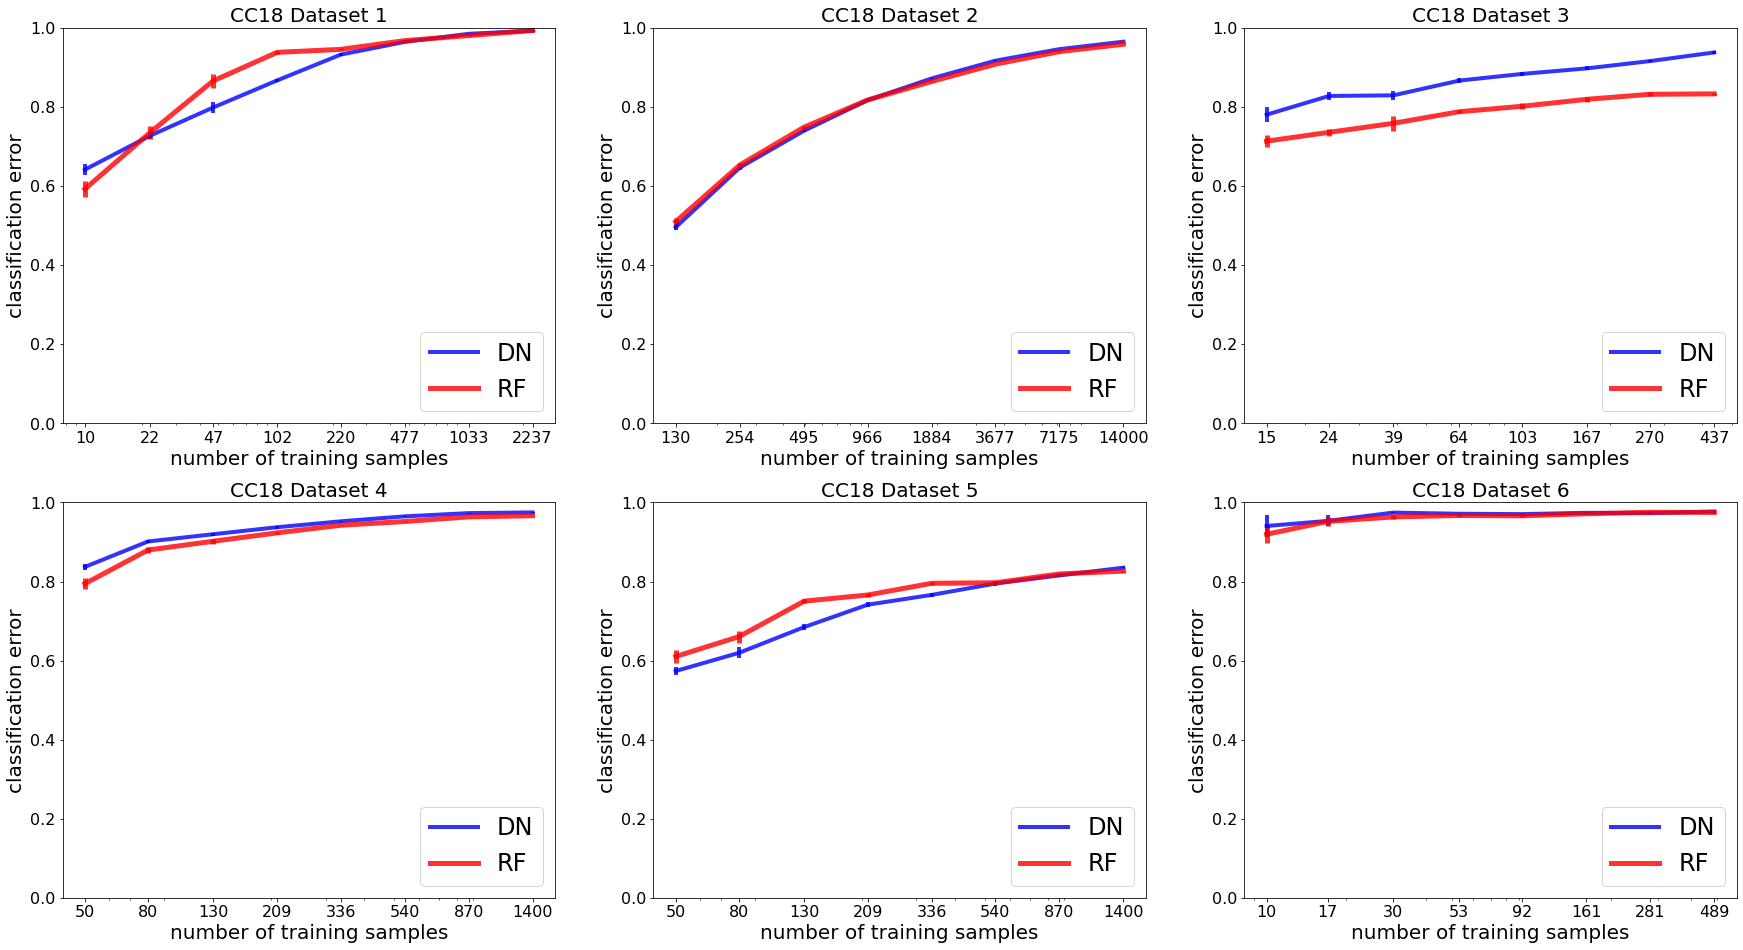

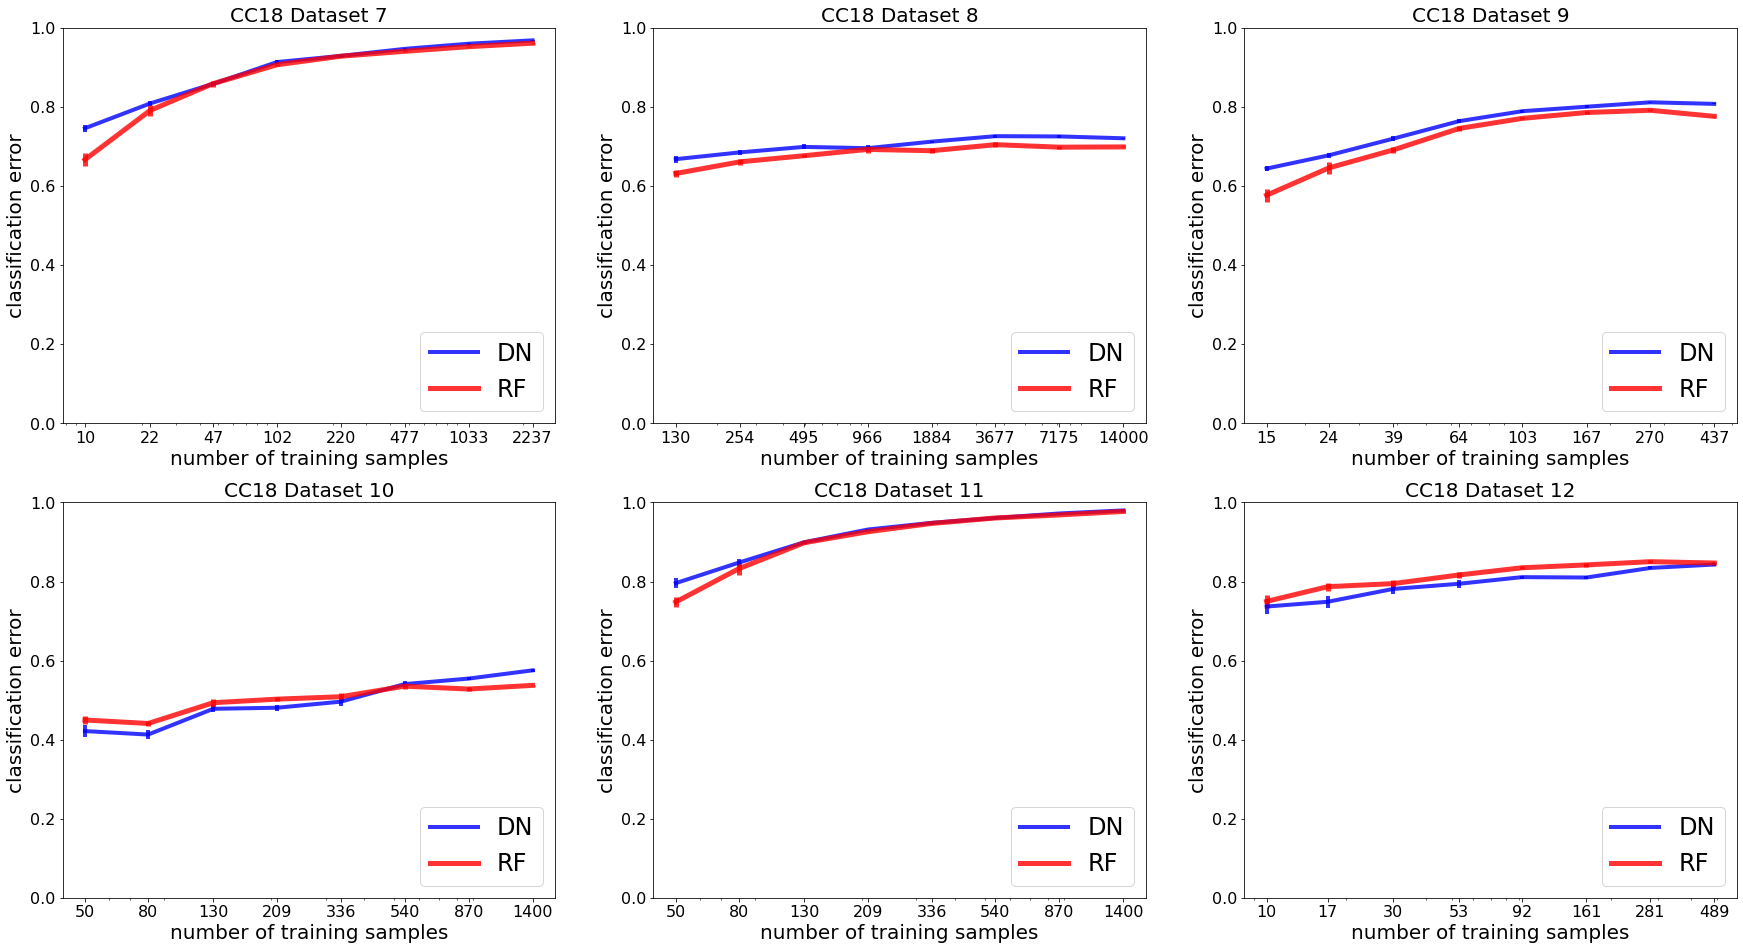

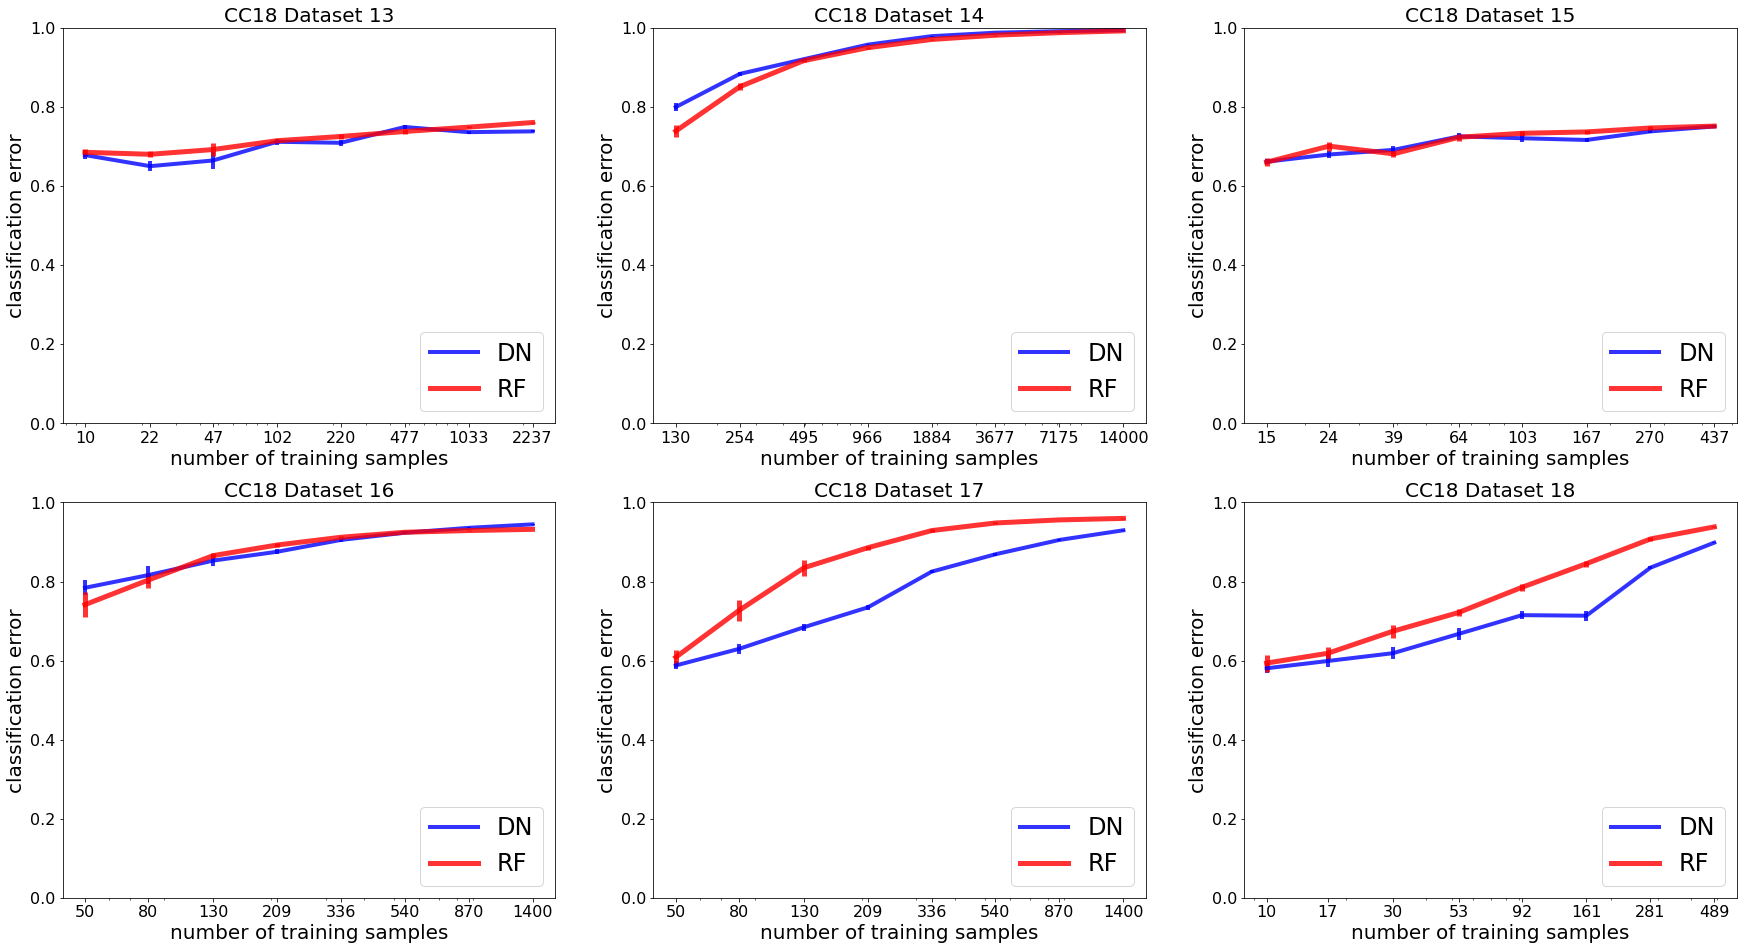

In [290]:
for plot in range(3):

    fig = plt.figure(figsize=(30,16))
    plt.tight_layout()

    for key in range(6):
        rf,dn = all_datasets_norm_boot4[key + 6*plot][0],all_datasets_norm_boot4[key + 6*plot][1]
        dn_evolution_mean = np.mean(dn, axis=1)
        rf_evolution_mean = np.mean(rf, axis=1)

        yerr_dn = stats.sem(dn, axis=1)
        yerr_rf = stats.sem(rf, axis=1)

        ax = plt.subplot(2,3,key+1)

        ax.errorbar(
            all_sample_sizes[key],
            dn_evolution_mean,
            yerr=yerr_dn,
            linewidth=4,
            c="b",
            alpha=0.8,
            label="DN",
        )
        ax.errorbar(
            all_sample_sizes[key],
            rf_evolution_mean,
            yerr=yerr_rf,
            linewidth=5,
            c="r",
            alpha=0.8,
            label="RF",
        )

        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)

        ax.set_xscale('log')
        ax.set_ylim([0,1])


        ax.set_xticks(all_sample_sizes[key])
        ax.set_xticklabels(all_sample_sizes[key])

        plt.xlabel("number of training samples", fontsize=20)
        plt.ylabel("classification error", fontsize=20)
        plt.title("CC18 Dataset " + str(key + 6*plot + 1), fontsize=20)

        handles, labels = ax.get_legend_handles_labels()
        handles = [h[0] for h in handles]
        ax.legend(handles, labels, prop={"size": 24}, loc='lower right')


In [291]:
all_params

[[{'alpha': 0.1, 'hidden_layer_sizes': 320}, {'max_features': 24}],
 [{'alpha': 0.01, 'hidden_layer_sizes': 320}, {'max_features': 4}],
 [{'alpha': 0.001, 'hidden_layer_sizes': 400}, {'max_features': 1}],
 [{'alpha': 0.1, 'hidden_layer_sizes': 320}, {'max_features': 15}],
 [{'alpha': 0.1, 'hidden_layer_sizes': 260}, {'max_features': 9}],
 [{'alpha': 0.001, 'hidden_layer_sizes': 80}, {'max_features': 2}],
 [{'alpha': 0.1, 'hidden_layer_sizes': 400}, {'max_features': 8}],
 [{'alpha': 0.0001, 'hidden_layer_sizes': 320}, {'max_features': 2}],
 [{'alpha': 0.001, 'hidden_layer_sizes': 80}, {'max_features': 7}],
 [{'alpha': 0.01, 'hidden_layer_sizes': 20}, {'max_features': 2}],
 [{'alpha': 0.1, 'hidden_layer_sizes': 140}, {'max_features': 8}],
 [{'alpha': 0.001, 'hidden_layer_sizes': 20}, {'max_features': 4}],
 [{'alpha': 0.1, 'hidden_layer_sizes': 140}, {'max_features': 4}],
 [{'alpha': 0.01, 'hidden_layer_sizes': 140}, {'max_features': 5}],
 [{'alpha': 0.01, 'hidden_layer_sizes': 20}, {'max

In [292]:
df = pd.DataFrame(data=all_params)
df.columns = ['DN Parameters', 'RF Parameters']
df

,DN Parameters,RF Parameters
0,"{'alpha': 0.1, 'hidden_layer_sizes': 320}",{'max_features': 24}
1,"{'alpha': 0.01, 'hidden_layer_sizes': 320}",{'max_features': 4}
2,"{'alpha': 0.001, 'hidden_layer_sizes': 400}",{'max_features': 1}
3,"{'alpha': 0.1, 'hidden_layer_sizes': 320}",{'max_features': 15}
4,"{'alpha': 0.1, 'hidden_layer_sizes': 260}",{'max_features': 9}
5,"{'alpha': 0.001, 'hidden_layer_sizes': 80}",{'max_features': 2}
6,"{'alpha': 0.1, 'hidden_layer_sizes': 400}",{'max_features': 8}
7,"{'alpha': 0.0001, 'hidden_layer_sizes': 320}",{'max_features': 2}
8,"{'alpha': 0.001, 'hidden_layer_sizes': 80}",{'max_features': 7}
9,"{'alpha': 0.01, 'hidden_layer_sizes': 20}",{'max_features': 2}
